<a href="https://colab.research.google.com/github/yacanom/MINE-4210_202320_ANALISIS_CON_DEEP_LEARNING/blob/main/Laboratorio%201/MINE4210-ADL2023%20-%20LAB1%20-%20Pr%C3%A1ctica%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Pŕactica No. 1**
## **Introducción a Keras y Tensorflow**

## **Objetivos**
- Introducción al uso de Tensorflow y Keras
- Entrenamiento de una red neuronal de una sola capa (modelo lineal)
- Ajuste de hiperparámetros en redes neuronales.

## **Problema**
- En este problema se busca analizar el Burn Rate (agotamiento de un trabajador) que puede llegar a tener un empleado que trabaja en una organización en función de las distintas condiciones previstas.


### 0. Importación de paquetes

Las librerías que se van a utilizar, por lo general se tienen que instalar desde consola para que se encuentren dentro del ambiente donde se está ejecutando el Notebook. Sin embargo, si se encuentran en un ambiente compartido como Google Colab o simplemente desean realizar la instalación de los paquetes desde el mismo notebook lo pueden hacer con el siguiente código

```
!pip install [nom_paquete]
```

Como por ejemplo:
```
!pip install pandas
```



In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install keras-tuner

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


Para este ejercicio, utilizaremos las siguientes librerías.

In [2]:
import numpy as np
import pandas as pd


from pandas_profiling import ProfileReport
from numpy import sqrt

import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils.vis_utils import plot_model
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

<ipython-input-2-14083b5daee3>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
<ipython-input-2-14083b5daee3>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-deep")


### 1. Entendimiento del Negocio

Según una encuesta anónima, unos 450 millones de personas viven con trastornos mentales que pueden ser una de las principales causas de mala salud y discapacidad en todo el mundo. Según la Organización Mundial de la Salud, el agotamiento es un síndrome resultante del estrés laboral que no se ha manejado con éxito. Se caracteriza por tres dimensiones: sentimientos de agotamiento o agotamiento de energía, aumento de la distancia mental del trabajo o sentimientos de negativismo o cinismo relacionados con el trabajo y eficacia profesional reducida.

Es de interés conocer la tasa de agotamiento de un empleado para poder tomar acciones en pro de la salud mental de las personas.




El negocio nos ha bridado el siguiente diccionario de datos:

| Columna | Descripción |
| --- | --- |
| Employee ID |  El ID único asignado a cada empleado **(ejemplo: fffe390032003000)**|
| Date of Joining|  La fecha-hora en la que el empleado se ha incorporado a la organización **(ejemplo: 2008-12-30)**|
| Gender|  El sexo biológico del empleado **(Male/Female)**|
| Company Type| El tipo de empresa donde trabaja el empleado **(Service/Product)**|
| WFH Setup Available| El empleado puede trabajar desde casa **(Yes/No)**|
| Designation|  La designación del empleado de trabajo en la organización. En el rango de [0.0, 5.0] mayor es la designación más alta.|
| Resource Allocation|  La cantidad de recursos asignados al empleado para trabajar, es decir, el número de horas de trabajo. En el rango de [1,0, 10,0] (mayor significa más recursos)|
| Mental Fatigue Score|  El nivel de fatiga mental al que se enfrenta el empleado. En el intervalo de [0,0, 10,0], donde 0,0 significa que no hay fatiga y 10,0 significa que la fatiga es total.
| Burn Rate|  indica la tasa de agotamiento durante el trabajo.En el intervalo de [0,0, 1,0], cuanto mayor sea el valor, mayor será el agotamiento.|



### 2. Entendimiento de los Datos

En este caso se realiza el cargue de los datos mediante la función read_csv de la libreria de Pandas, la cual permite leer los datos de una archivo csv y cargarlos en un objeto DataFrame de Pandas. Para más detalle de la función y los parámetros que recibe se puede consultar: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [3]:
url = 'https://raw.githubusercontent.com/yacanom/MINE-4210_202320_ANALISIS_CON_DEEP_LEARNING/main/Laboratorio%201/data/data.csv'
data = pd.read_csv(url)

data.head() #Veremos las primeras líneas del dataset, para ver si leyó correctamente

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
#Veremos la información general del dataframe: total de registros, saber si existen columna con datos nulos así como los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


Para poder realizar el entrenamiento de nuestros algoritmos se requiere dividir nuestros los en datos de entrenamiento (train) y datos de evaluación (test) con el fin de poder descubrir como le iria al modelo entrenado con datos de la población que no ha conocido antes.

Por lo general, se recomienda realizar un partición aleatoria y dejar una proporción $80\% - 20\%$. Sin embargo, estas divisiones pueden variar dependiendo el tipo de datos y el entrenamiento que estemos desarrollando.

In [5]:
#Se procede a realizar la división de datos, en donde se asigna un 20% para los datos de test:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1567,fffe31003000300039003500,2008-08-26,Female,Service,Yes,1.0,3.0,4.2,0.32
9298,fffe32003400310030003200,2008-09-01,Male,Product,No,3.0,6.0,6.6,0.61
9931,fffe3500310038003300,2008-11-04,Female,Product,Yes,1.0,2.0,3.0,0.19
16989,fffe3500380037003200,2008-10-05,Female,Service,No,3.0,6.0,5.4,0.34
3368,fffe31003100350031003500,2008-08-28,Male,Product,Yes,1.0,2.0,3.1,0.16


Utilizaremos la libreria de pandas-profiling para realizar una exploración de datos más profunda

In [6]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Del perfilamiento de datos realizados, se puede observar:

*   Existen valores nulos en las columnas: Resource Allocation (6.1%), Mental Fatigue Score (9.4%) y Burn Rate(5.0%)
*   Las columnas 'Gender', 'Company Type' y 'WFH Setup Available' de tipo categóricas solo presentan 2 opciones.



### 3. Preparación de los Datos

Para efectos de la práctica, siguiendo el análisis de las clases anteriores, solo trabajaremos las variables numéricas para entrenar nuestro modelo. Además dividiremos nuestro conjunto en las variables predictoras (X) y la variable resultado (Y).

In [7]:
#1 Eliminamos la columna Employee ID, dado que por ser valores únicos no son datos que ayude al modelo a realizar la predicción.
train = train.drop(['Employee ID'], axis=1)
train

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1567,2008-08-26,Female,Service,Yes,1.0,3.0,4.2,0.32
9298,2008-09-01,Male,Product,No,3.0,6.0,6.6,0.61
9931,2008-11-04,Female,Product,Yes,1.0,2.0,3.0,0.19
16989,2008-10-05,Female,Service,No,3.0,6.0,5.4,0.34
3368,2008-08-28,Male,Product,Yes,1.0,2.0,3.1,0.16
...,...,...,...,...,...,...,...,...
10435,2008-10-06,Male,Service,No,2.0,3.0,4.8,0.41
57,2008-12-22,Male,Service,No,2.0,5.0,8.0,0.61
578,2008-02-12,Male,Service,Yes,3.0,5.0,6.3,0.44
5848,2008-02-14,Male,Service,Yes,2.0,5.0,7.2,NaN


In [8]:
#2 Dado que en la columna de nuestro interés a predecir tiene datos nulos, procedemos a eliminar estos registros:
train = train.dropna(subset=['Burn Rate'])
train

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1567,2008-08-26,Female,Service,Yes,1.0,3.0,4.2,0.32
9298,2008-09-01,Male,Product,No,3.0,6.0,6.6,0.61
9931,2008-11-04,Female,Product,Yes,1.0,2.0,3.0,0.19
16989,2008-10-05,Female,Service,No,3.0,6.0,5.4,0.34
3368,2008-08-28,Male,Product,Yes,1.0,2.0,3.1,0.16
...,...,...,...,...,...,...,...,...
16486,2008-10-19,Male,Service,Yes,4.0,NaN,8.4,0.66
10435,2008-10-06,Male,Service,No,2.0,3.0,4.8,0.41
57,2008-12-22,Male,Service,No,2.0,5.0,8.0,0.61
578,2008-02-12,Male,Service,Yes,3.0,5.0,6.3,0.44


In [9]:
#3 Eliminamos los registros de las otras dos columnas que tienen datos nulos
train = train.dropna(subset=['Mental Fatigue Score', 'Resource Allocation'])
train

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1567,2008-08-26,Female,Service,Yes,1.0,3.0,4.2,0.32
9298,2008-09-01,Male,Product,No,3.0,6.0,6.6,0.61
9931,2008-11-04,Female,Product,Yes,1.0,2.0,3.0,0.19
16989,2008-10-05,Female,Service,No,3.0,6.0,5.4,0.34
3368,2008-08-28,Male,Product,Yes,1.0,2.0,3.1,0.16
...,...,...,...,...,...,...,...,...
2109,2008-03-13,Female,Product,Yes,2.0,5.0,5.7,0.36
10435,2008-10-06,Male,Service,No,2.0,3.0,4.8,0.41
57,2008-12-22,Male,Service,No,2.0,5.0,8.0,0.61
578,2008-02-12,Male,Service,Yes,3.0,5.0,6.3,0.44


In [10]:
#4 Ahora pasamos las variables categóricas a numéricas. Empezamos con 'Gender', 'Company Type' y 'WFH Setup Available' que solo tienen dos opcines cada una
train.loc[:, 'Gender'] = train['Gender'].map({'Female': 1, 'Male': 0})
train.loc[:, 'Company Type'] = train['Company Type'].map({'Service': 1, 'Product': 0})
train.loc[:, 'WFH Setup Available'] = train['WFH Setup Available'].map({'Yes': 1, 'No': 0})

<ipython-input-10-dc64a3dbd451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Gender'] = train['Gender'].map({'Female': 1, 'Male': 0})
<ipython-input-10-dc64a3dbd451>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'Gender'] = train['Gender'].map({'Female': 1, 'Male': 0})
<ipython-input-10-dc64a3dbd451>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [11]:
train.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1567,2008-08-26,1,1,1,1.0,3.0,4.2,0.32
9298,2008-09-01,0,0,0,3.0,6.0,6.6,0.61
9931,2008-11-04,1,0,1,1.0,2.0,3.0,0.19
16989,2008-10-05,1,1,0,3.0,6.0,5.4,0.34
3368,2008-08-28,0,0,1,1.0,2.0,3.1,0.16


In [12]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-12-485ba64038d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,1.000000,0.015011,0.070678,-0.115837,-0.145355,-0.144858,-0.158051
Company Type,0.015011,1.000000,0.001917,0.003030,-0.000275,0.000860,0.002332
WFH Setup Available,0.070678,0.001917,1.000000,-0.227454,-0.281358,-0.273934,-0.302311
Designation,-0.115837,0.003030,-0.227454,1.000000,0.877920,0.694599,0.738239
Resource Allocation,-0.145355,-0.000275,-0.281358,0.877920,1.000000,0.800520,0.855981
Mental Fatigue Score,-0.144858,0.000860,-0.273934,0.694599,0.800520,1.000000,0.944825
Burn Rate,-0.158051,0.002332,-0.302311,0.738239,0.855981,0.944825,1.000000


In [13]:
#5 Finalmente se divide la columna 'Date of Joining' en columas de año, mes y día

# Convierte la columna 'Date of Joining' en un objeto de fecha y hora
train.loc[:, 'Date of Joining'] = pd.to_datetime(train['Date of Joining'])

#se generan las columas para año, med y día.
train.loc[:, 'year'] = train['Date of Joining'].dt.year
train.loc[:, 'month'] = train['Date of Joining'].dt.month
train.loc[:, 'day'] = train['Date of Joining'].dt.day

#borramos la columna 'Date of Joining'
train = train.dropna(subset=['Date of Joining'])

train = train.reindex(columns=['year', 'month', 'day', 'Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'])


<ipython-input-13-79dafd1c18d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Date of Joining'] = pd.to_datetime(train['Date of Joining'])
<ipython-input-13-79dafd1c18d8>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, 'Date of Joining'] = pd.to_datetime(train['Date of Joining'])
<ipython-input-13-79dafd1c18d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [14]:
train.head()

,year,month,day,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1567,2008,8,26,1,1,1,1.0,3.0,4.2,0.32
9298,2008,9,1,0,0,0,3.0,6.0,6.6,0.61
9931,2008,11,4,1,0,1,1.0,2.0,3.0,0.19
16989,2008,10,5,1,1,0,3.0,6.0,5.4,0.34
3368,2008,8,28,0,0,1,1.0,2.0,3.1,0.16


Ahora separamos nuestros datos de entrada a la red neuronal X, y muestra variable a predecir y

In [15]:
X_n = train.drop(['Burn Rate'], axis=1)
Y = train['Burn Rate']
display(X_n.head())
Y.head()

,year,month,day,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
1567,2008,8,26,1,1,1,1.0,3.0,4.2
9298,2008,9,1,0,0,0,3.0,6.0,6.6
9931,2008,11,4,1,0,1,1.0,2.0,3.0
16989,2008,10,5,1,1,0,3.0,6.0,5.4
3368,2008,8,28,0,0,1,1.0,2.0,3.1


1567     0.32
9298     0.61
9931     0.19
16989    0.34
3368     0.16
Name: Burn Rate, dtype: float64

Adicionalmente, normalizaremos los datos.

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X_n)
display(pd.DataFrame(X, columns=X_n.columns))

Y = (Y - Y.mean())/Y.std()
display(pd.DataFrame(Y))

,year,month,day,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0.0,0.433119,1.162081,0.954683,0.724362,0.928835,-1.039204,-0.725953,-0.788985
1,0.0,0.723993,-1.685729,-1.047468,-1.380526,-1.076617,0.724906,0.740972,0.454407
2,0.0,1.305743,-1.343991,0.954683,-1.380526,0.928835,-1.039204,-1.214929,-1.410681
3,0.0,1.014868,-1.230079,0.954683,0.724362,-1.076617,0.724906,0.740972,-0.167289
4,0.0,0.433119,1.389906,-1.047468,-1.380526,0.928835,-1.039204,-1.214929,-1.358873
...,...,...,...,...,...,...,...,...,...
14841,0.0,-1.021255,-0.318780,0.954683,-1.380526,0.928835,-0.157149,0.251997,-0.011865
14842,0.0,1.014868,-1.116167,-1.047468,0.724362,-1.076617,-0.157149,-0.725953,-0.478137
14843,0.0,1.596618,0.706432,-1.047468,0.724362,-1.076617,-0.157149,0.251997,1.179719
14844,0.0,-1.312130,-0.432692,-1.047468,0.724362,0.928835,0.724906,0.251997,0.298983


,Burn Rate
1567,-0.664112
9298,0.797750
9931,-1.319429
16989,-0.563293
3368,-1.470656
...,...
2109,-0.462475
10435,-0.210430
57,0.797750
578,-0.059203


### 4. Modeamiento

Vamos a utilizar la arquitectura de un Perceptron de una sola capa, la cual se ve de la siguiente manera:

![Multilayer Perceptron](https://github.com/jcestevezc/Machine-Learning-Techniques/blob/master/Laboratorio%205/MLP.png?raw=true)

Para ello, lo primero que definiremos, será nuestro modelo.

La libreria Keras nos permite crear modelos secuenciales mediante la clase **Sequential**, primero definimos el modelo y le asignamos un nombre, seguido se usa el método **add** para ir adicionando las capas que vamos requieriendo.

La primera capa, que corresponde a la capa de entrada (tipo Input), se debe especificar con el número de neuronas que corresponde al número de características que vamos a tener en nuesto modelo, en este caso nuestros datos en X contienen 9 columnas o características, por ende se requieren sea de 9.
Una forma general de definilo es usando el método shape: X.shape[1]

Seguido a la capa de entrada agregamos una capa de tipo Dense, que será nuestra capa oculta, la cual inicialmente asignaremos 3 neuronas y utilizará la función de activación RELU.

Finalmente, se adiciona la capa de salida (también de tipo Dense pero con función de activación LINEAR), que nos dará el resultado de las predicciones de nuestro modelo. En este caso es un solo valor (Burn Out) y por ende se define con 1 sola neurona de salida.


In [17]:
model = Sequential(name="Mi_primer_MLP")

In [18]:
model.add(Input(shape=(X.shape[1]), name='Capa_Entrada'))
model.add(Dense(3,activation='relu',name='Capa_Oculta'))
model.add(Dense(1,activation='linear',name='Capa_Salida'))

El método **compile** permite configurar nuestro modelo para el entrenamiento. Este método acepta varios argumentos, como el *optimizador*, la *función de pérdida* y las *métricas*, que se utilizan para optimizar los pesos del modelo durante el entrenamiento.

In [19]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "Mi_primer_MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Oculta (Dense)         (None, 3)                 30        
                                                                 
 Capa_Salida (Dense)         (None, 1)                 4         
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


Mostramos nuestro modelo base

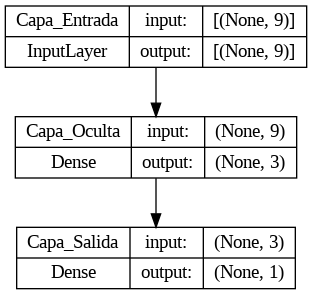

In [20]:
plot_model(model, show_shapes=True, show_layer_names=True)

Y realizamos el entreno de nuestro modelo, para esto usamos el método fit.

In [21]:
history = model.fit(
    X,
    Y,
    batch_size=10,
    epochs=50
)

Epoch 1/50
1485/1485 [==============================] - 8s 4ms/step - loss: 0.4271 - mae: 0.4810 - mse: 0.4271 - root_mean_squared_error: 0.6535
Epoch 2/50
1485/1485 [==============================] - 3s 2ms/step - loss: 0.0923 - mae: 0.2452 - mse: 0.0923 - root_mean_squared_error: 0.3038
Epoch 3/50
1485/1485 [==============================] - 2s 2ms/step - loss: 0.0787 - mae: 0.2294 - mse: 0.0787 - root_mean_squared_error: 0.2806
Epoch 4/50
1485/1485 [==============================] - 2s 2ms/step - loss: 0.0767 - mae: 0.2269 - mse: 0.0767 - root_mean_squared_error: 0.2769
Epoch 5/50
1485/1485 [==============================] - 3s 2ms/step - loss: 0.0761 - mae: 0.2262 - mse: 0.0761 - root_mean_squared_error: 0.2760
Epoch 6/50
1485/1485 [==============================] - 3s 2ms/step - loss: 0.0761 - mae: 0.2263 - mse: 0.0761 - root_mean_squared_error: 0.2759
Epoch 7/50
1485/1485 [==============================] - 3s 2ms/step - loss: 0.0759 - mae: 0.2262 - mse: 0.0759 - root_mean_squared

## 5. Evaluación

Para mirar el rendimiento de nuestro modelo, vamos a utilizar nuestros datos de entrenamiento.

In [22]:
y_pred = model.predict(X, batch_size=1)
y_pred

14846/14846 [==============================] - 19s 1ms/step


array([[-0.8164358 ],
       [ 0.5471456 ],
       [-1.3429979 ],
       ...,
       [ 0.9834946 ],
       [ 0.20374042],
       [ 0.43687147]], dtype=float32)

Para determinar nuestro rendimiento, vamos a utilizar las métricas: $MSE$, $MAE$, $RMSE$

In [23]:
n,p = X.shape

print('------------ Resultados ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(Y,y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(Y,y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(Y,y_pred)))

------------ Resultados ------------
Mean Squared Error (MSE): 0.07552
Mean Absolute Error (MAE): 0.22617
Root Mean Squared Error (RMSE): 0.27481


Y realizaremos una gráfica para ver como es el comportamiento de los datos reales vs los datos predichos.

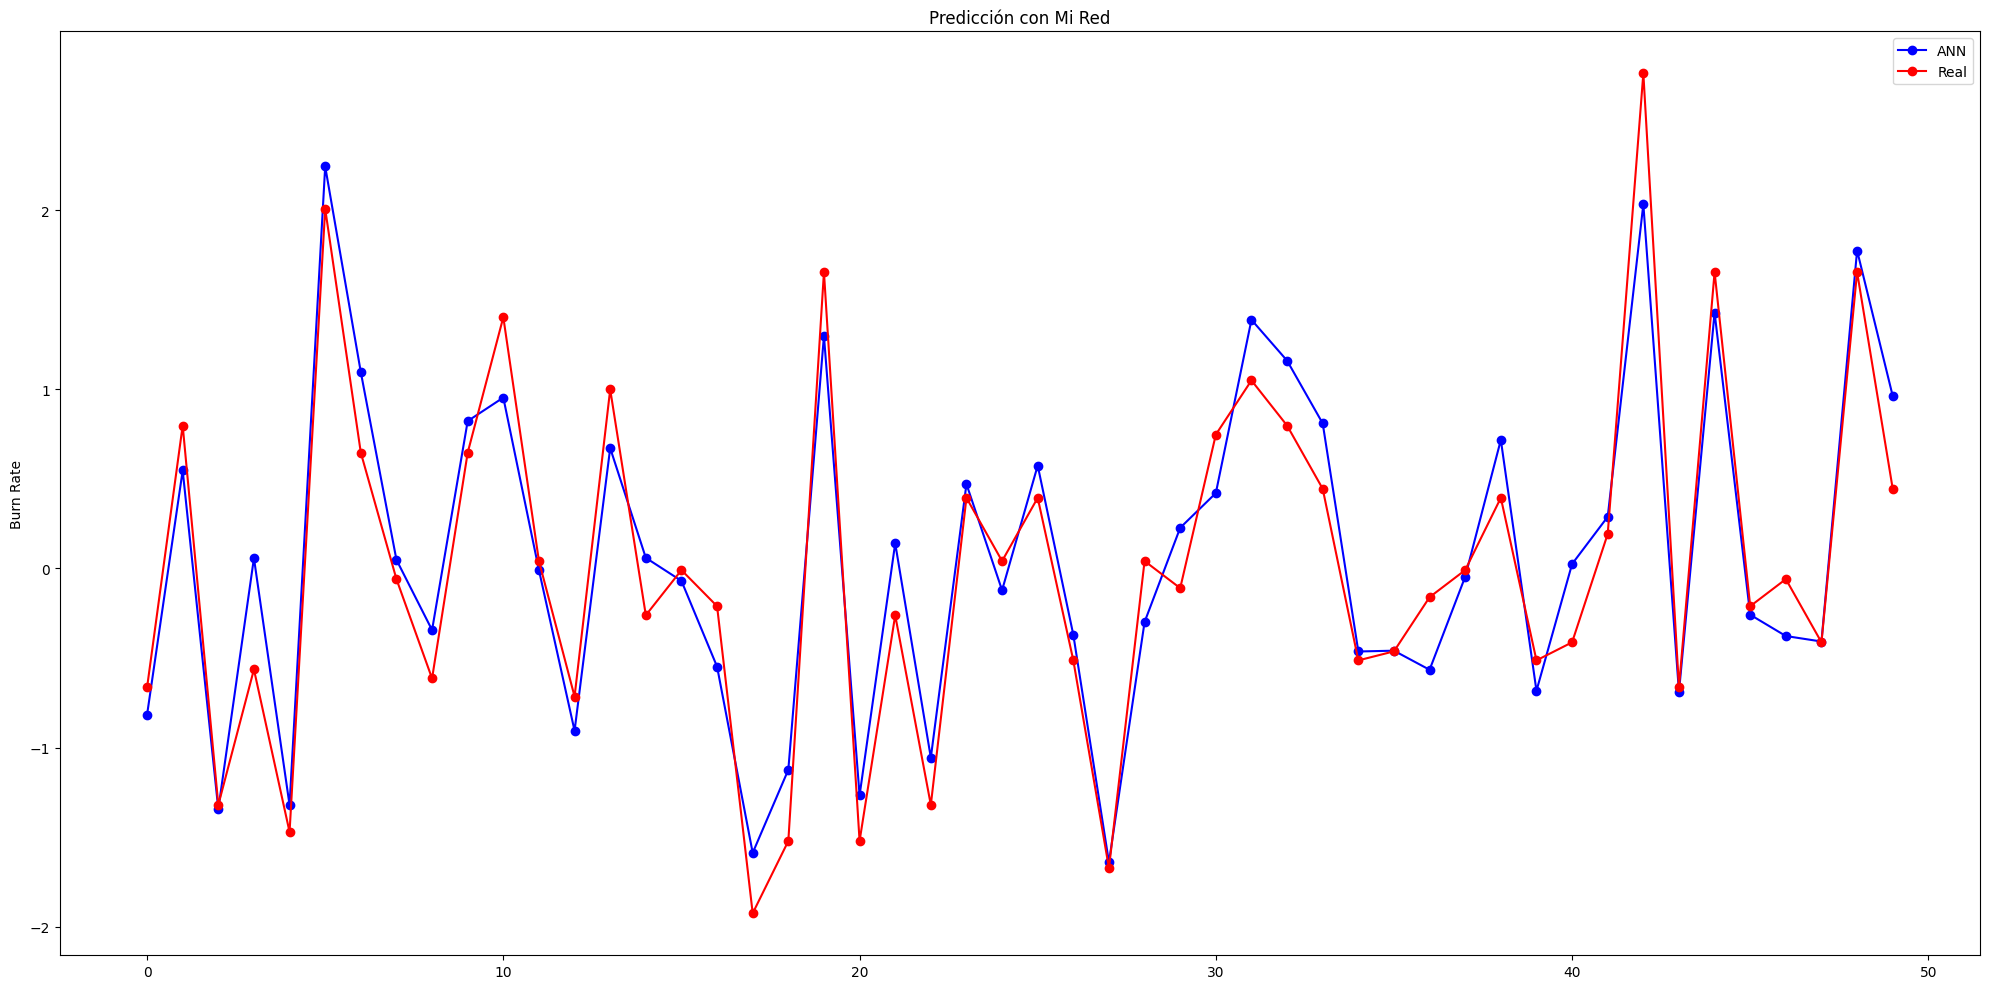

In [24]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='ANN')
axs.plot(xvals, Y[:50],'ro-', label='Real')

axs.set(title='Predicción con Mi Red',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

Dados estos resultados, ¿Cómo sabemos que escogimos los hiperparámetros correctos?

### Búsqueda de Hiperparámetros

Para realizar la búsqueda de hipérparámetros, realizaremos una búsqueda en un espacio definido. Para ello, utilizaremos a herramienta `keras-tuner`.

Para ello, construimos una función que nos permita construir la Red Neuronal esperada y utilizamos la función [RandomizedSearchCV](https://keras.io/guides/keras_tuner/getting_started/) integrada directamente con Keras.

Pero primero, dividiremos nuestros datos en entrenamiento y validación.

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=33)
display(pd.DataFrame(X_val, columns=X_n.columns).head())
y_val

,year,month,day,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0.0,1.596618,-1.116167,0.954683,0.724362,0.928835,1.606960,1.718923,1.490567
1,0.0,-0.730381,-0.546605,-1.047468,0.724362,-1.076617,0.724906,0.251997,1.335143
2,0.0,-0.439506,-0.318780,-1.047468,-1.380526,0.928835,0.724906,0.740972,0.765255
3,0.0,-1.312130,-0.204867,0.954683,0.724362,-1.076617,0.724906,0.251997,0.350791
4,0.0,0.723993,-1.571816,0.954683,0.724362,-1.076617,-0.157149,0.251997,0.350791


21502    1.755522
21436    0.948977
7252     1.150613
13918    0.192842
6831     0.092024
           ...   
22640    1.453067
1725     0.344069
5871     0.545705
6887    -0.311248
17807   -0.412066
Name: Burn Rate, Length: 2970, dtype: float64

Definimos la función **entrenarRed** construir la Red Neuronal, llamaremos a nuestro modelo como clf, y tendremos 4 posibles opciones de número de neuronas para nuestra capa oculta.

La clase RandomSearch de la biblioteca Keras Tuner se utiliza para buscar los mejores hiperparámetros para la red neuronal. El objetivo de la búsqueda en este caso es minimizar el error cuadrático medio de validación (val_mse), y la búsqueda se realiza durante un máximo de 4 pruebas. El parámetro seed se establece en 123 para garantizar la reproducibilidad.

Como optimizador se usa RMSprop que busca mantener un promedio móvil del cuadrado de los gradientes y dividir el gradiente por la raíz de este promedio. Esto ayuda a prevenir que los gradientes se desvanezcan o exploten, lo que puede ser un problema al entrenar redes neuronales.

In [26]:
def entrenarRed(hp):
    clf = Sequential(name='Mi_Red')
    neuronas = hp.Choice('neuronas', [5, 10, 15, 20])

    clf.add(Input(shape=(X.shape[1]), name='Capa_Entrada'))
    clf.add(Dense(neuronas,activation='relu',name='Capa_Oculta'))
    clf.add(Dense(1,activation='linear',name='Capa_Salida'))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    clf.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', tf.keras.metrics.RootMeanSquaredError()])

    return clf

tuner = kt.RandomSearch(
    entrenarRed,
    objective="val_mse",
    seed=123,
    max_trials=4)

Ya con nuestros valores de búsqueda definidos dentro de nuestra función, y nuestro objeto tuner inizializado. Podemos realizar la búsqueda de los hierparámetros como ya hemos venido realizandolo.


In [27]:
tuner.search(X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=10,
    epochs=30
)

best_model = tuner.get_best_models()[0]

Y realizamos la descarga de nuestro modelo, junto con la vizualización de la arquitectura escogida por la búsqueda Aleatoria.

In [28]:
best_model.save('best_model_regressor.h5')
best_model.summary()

Model: "Mi_Red"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Oculta (Dense)         (None, 10)                100       
                                                                 
 Capa_Salida (Dense)         (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


Podemos también mirar un resumen de lo que fue nuestra búsqueda de hiperparámetros.

In [29]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 3 summary
Hyperparameters:
neuronas: 10
Score: 0.07079044729471207

Trial 2 summary
Hyperparameters:
neuronas: 15
Score: 0.07087155431509018

Trial 1 summary
Hyperparameters:
neuronas: 20
Score: 0.07094692438840866

Trial 0 summary
Hyperparameters:
neuronas: 5
Score: 0.07096769660711288


Ahora realizaremos la predcción, con los datos conocidos, y lo realizaremos sobre el conjunto total de los datos de entrenamiento.

In [30]:
y_pred = best_model.predict(X, batch_size=1)
y_pred

14846/14846 [==============================] - 32s 2ms/step


array([[-0.7929941 ],
       [ 0.5615486 ],
       [-1.3156224 ],
       ...,
       [ 0.96860003],
       [ 0.16420345],
       [ 0.38748932]], dtype=float32)

Para determinar nuestro rendimiento, vamos a utilizar dos métricas, el $MSE$ y el $R^2$.

In [31]:
n,p = X.shape

print('------------ Resultados ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(Y,y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(Y,y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(Y,y_pred)))

------------ Resultados ------------
Mean Squared Error (MSE): 0.07390
Mean Absolute Error (MAE): 0.22249
Root Mean Squared Error (RMSE): 0.27185


Y realizaremos una gráfica para ver como es el comportamiento de los datos reales vs los datos predichos.

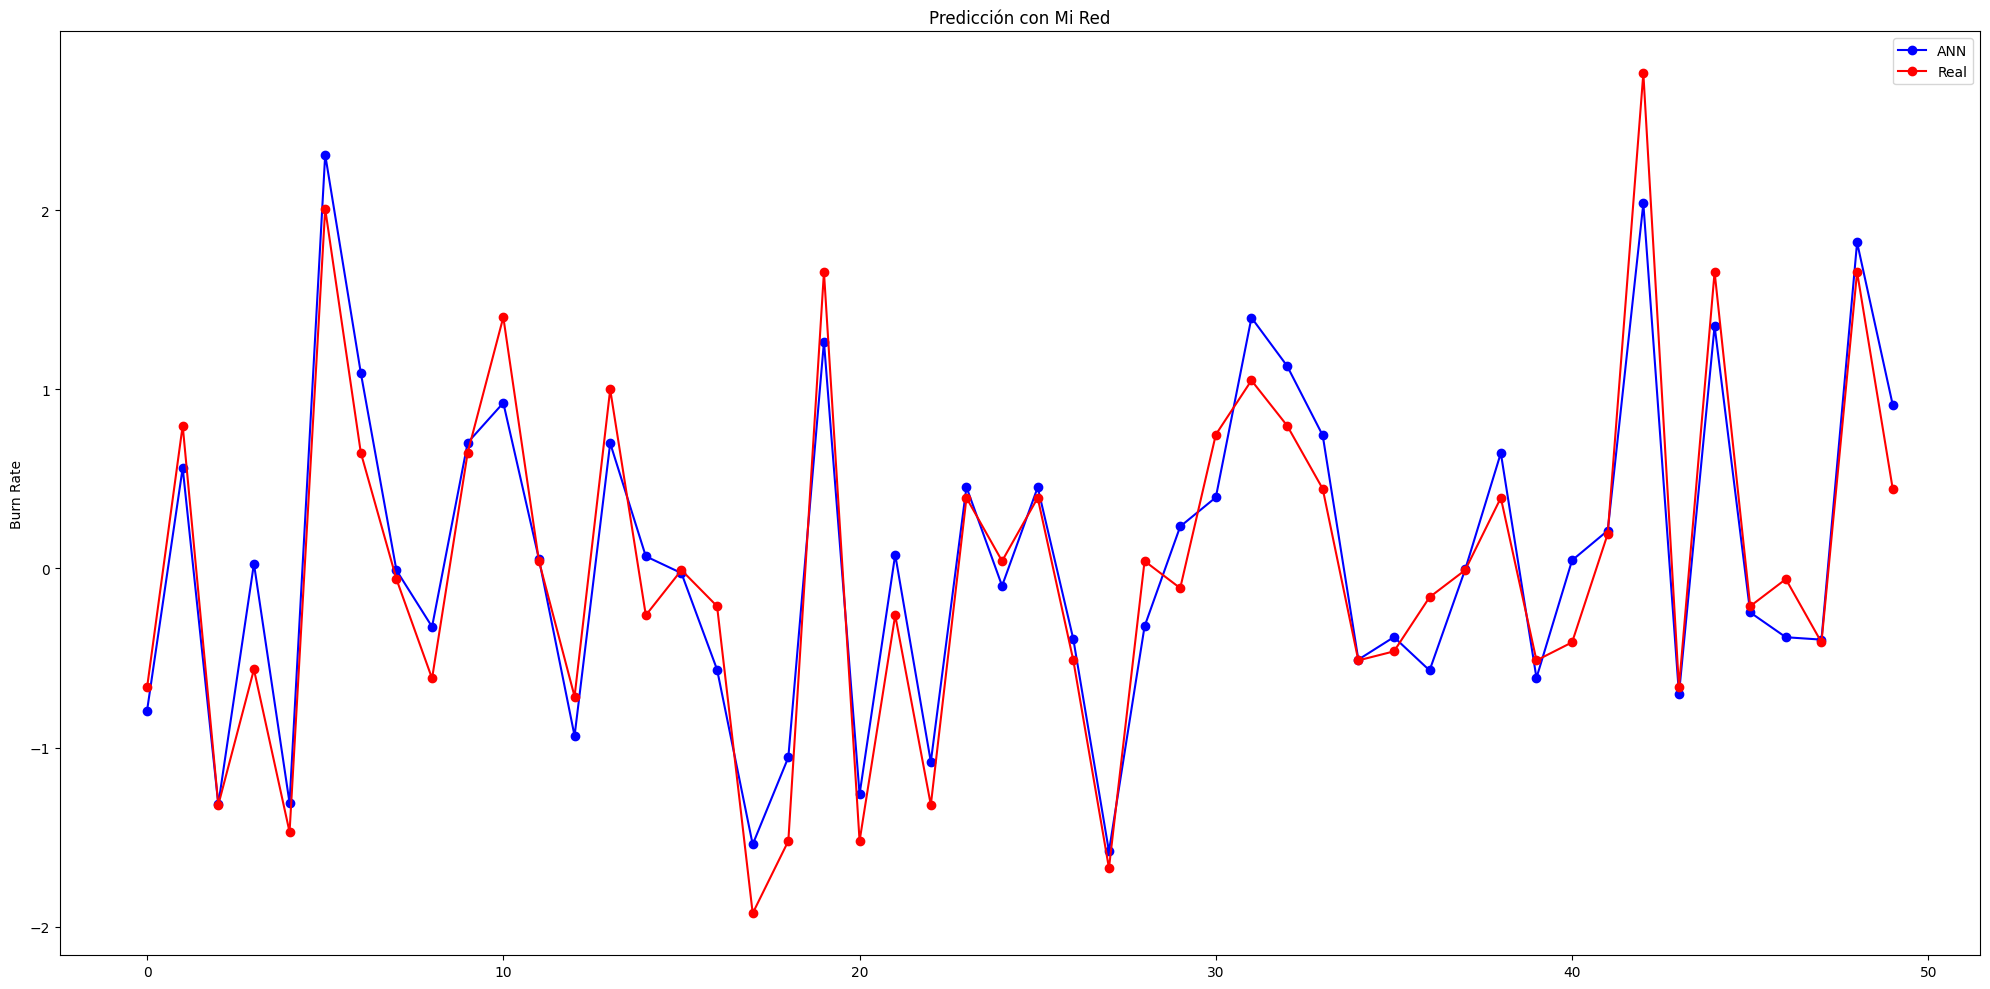

In [32]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='ANN')
axs.plot(xvals, Y[:50],'ro-', label='Real')

axs.set(title='Predicción con Mi Red',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

### Evaluacion con datos desconocidos.

Y ahora, miraremos como le va a nuestro algoritmo con datos desconocidos.

Pero primero, tenemos que preparar los datos como los teníamos antes

In [33]:
#1 Eliminamos la columna Employee ID, dado que por ser valores únicos no son datos que ayude al modelo a realizar la predicción.
test = test.drop(['Employee ID'], axis=1)
#2 Eliminamos valores nulos
test = test.dropna(subset=['Burn Rate'])
test = test.dropna(subset=['Mental Fatigue Score', 'Resource Allocation'])
#3 Ahora pasamos las variables categóricas a numéricas. Empezamos con 'Gender', 'Company Type' y 'WFH Setup Available' que solo tienen dos opcines cada una
test.loc[:, 'Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test.loc[:, 'Company Type'] = test['Company Type'].map({'Service': 1, 'Product': 0})
test.loc[:, 'WFH Setup Available'] = test['WFH Setup Available'].map({'Yes': 1, 'No': 0})
#4 Conviertir la columna 'Date of Joining' en un objeto de fecha y hora. Luego se generan las columas para año, med y día.
test.loc[:, 'Date of Joining'] = pd.to_datetime(test['Date of Joining'])
test.loc[:, 'year'] = test['Date of Joining'].dt.year
test.loc[:, 'month'] = test['Date of Joining'].dt.month
test.loc[:, 'day'] = test['Date of Joining'].dt.day

test = test.dropna(subset=['Date of Joining'])
test = test.reindex(columns=['year', 'month', 'day', 'Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'])

#Dividimos nuestros datos en la características y los valores a predecir
X_n = test.drop(['Burn Rate'], axis=1)
Y = test['Burn Rate']
display(X_n.head())
Y.head()

#Escalamos los datos
X_test = scaler.fit_transform(X_n)
display(pd.DataFrame(X_test, columns=X_n.columns))

y_test = (Y - Y.mean())/Y.std()
display(pd.DataFrame(y_test))

<ipython-input-33-9abdb3a71988>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, 'Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
<ipython-input-33-9abdb3a71988>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:, 'Company Type'] = test['Company Type'].map({'Service': 1, 'Product': 0})
<ipython-input-33-9abdb3a71988>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.colu

,year,month,day,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
11358,2008,3,18,1,1,1,2.0,3.0,6.7
18573,2008,2,17,1,1,1,2.0,4.0,6.1
3385,2008,1,23,1,0,1,0.0,1.0,2.7
21788,2008,9,5,0,1,0,3.0,8.0,8.5
18503,2008,5,31,0,0,1,2.0,5.0,6.1


,year,month,day,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0.0,-1.022255,0.247568,0.943880,0.732335,0.904144,-0.162988,-0.731128,0.494969
1,0.0,-1.313129,0.133671,0.943880,0.732335,0.904144,-0.162988,-0.241792,0.175999
2,0.0,-1.604004,0.817054,0.943880,-1.365495,0.904144,-1.931768,-1.709800,-1.631500
3,0.0,0.722990,-1.233095,-1.059457,0.732335,-1.106019,0.721401,1.715550,1.451880
4,0.0,-0.440507,1.728231,-1.059457,-1.365495,0.904144,-0.162988,0.247543,0.175999
...,...,...,...,...,...,...,...,...,...
3739,0.0,1.304739,-1.233095,0.943880,-1.365495,-1.106019,-0.162988,-0.731128,0.282322
3740,0.0,-0.149632,-0.891403,0.943880,-1.365495,0.904144,2.490180,2.694222,1.930336
3741,0.0,-0.440507,-1.119198,0.943880,0.732335,0.904144,-1.047378,-0.731128,-0.674589
3742,0.0,1.304739,-0.435815,-1.059457,0.732335,0.904144,-0.162988,-0.241792,-1.099882


,Burn Rate
11358,0.228784
18573,-0.282111
3385,-1.354990
21788,1.710378
18503,0.688589
...,...
19493,0.228784
3747,1.761468
3614,-0.282111
3601,-0.997364


In [34]:
y_pred = best_model.predict(X_test, batch_size=1)
y_pred

3744/3744 [==============================] - 5s 1ms/step


array([[ 0.11033989],
       [-0.00861239],
       [-1.6651934 ],
       ...,
       [-0.64668673],
       [-0.89681506],
       [-0.47923392]], dtype=float32)

In [35]:
n,p = X.shape

print('------------ Resultados ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(y_test, y_pred)))

------------ Resultados ------------
Mean Squared Error (MSE): 0.07852
Mean Absolute Error (MAE): 0.23060
Root Mean Squared Error (RMSE): 0.28021


Y realizaremos una gráfica para ver como es el comportamiento de los datos reales vs los datos predichos.

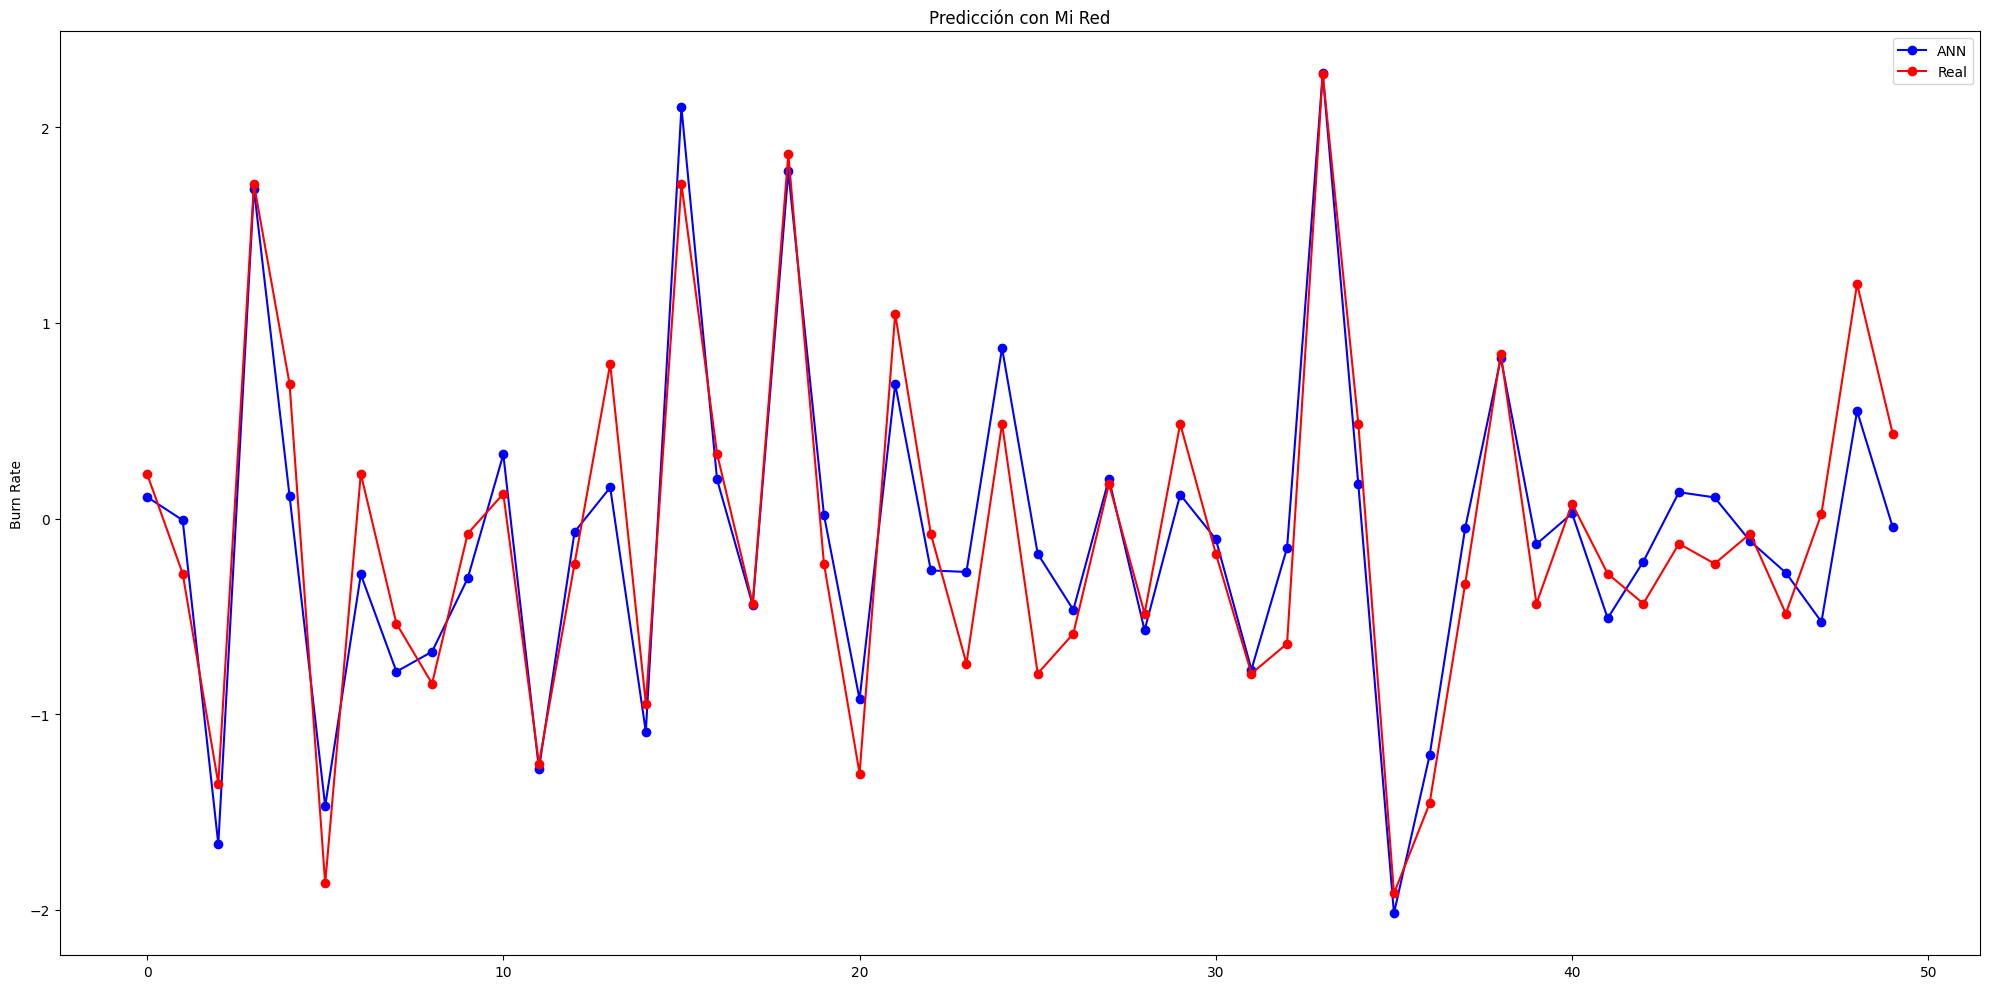

In [36]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_test[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='ANN')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Predicción con Mi Red',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

## 6. Hands on

1.   Con el mismo conjunto de datos del presente laboratorio, en vez de separar la fecha (Date of Joining) en 3  columnas, realice una tranformación para tener el total dias que ha estado empleada la persona, genere la funcion para construir la red neuronal, y realice busqueda de hiperparámetros para obtener el mejor modelo posible. Con los cambios indicados ¿cuántas neuronas son necesarias en la capa de entrada?

2.  ¿Cómo son los resultados si  en la capa de salida se usa la funcion de activacion relu en vez de lineal?

3.  Resuma en una tabla los resultados obtenidos de: el mejor modelo de este laboratorio, el mejor modelo del punto 1, y el mejor modelo del punto2.